In [1]:
!pip uninstall -y tensorflow

Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1


In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 46kB/s 


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
X_train = X_train / 255.0

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test = X_test / 255.0

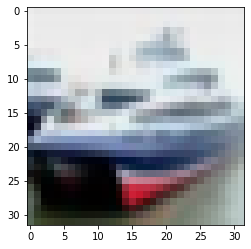

In [10]:
plt.imshow(X_test[1])

In [11]:
model = tf.keras.models.Sequential()

In [12]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

In [13]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [14]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [15]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [16]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [17]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [18]:
model.add(tf.keras.layers.Flatten())

In [19]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [20]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [22]:
y_test[0]

array([3], dtype=uint8)

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [24]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 247s 158ms/step - loss: 1.6427 - sparse_categorical_accuracy: 0.3953
Epoch 2/5
1563/1563 [==============================] - 250s 160ms/step - loss: 0.9834 - sparse_categorical_accuracy: 0.6547
Epoch 3/5
1563/1563 [==============================] - 245s 157ms/step - loss: 0.7631 - sparse_categorical_accuracy: 0.7334
Epoch 4/5
1563/1563 [==============================] - 245s 157ms/step - loss: 0.6273 - sparse_categorical_accuracy: 0.7798
Epoch 5/5
1563/1563 [==============================] - 250s 160ms/step - loss: 0.5151 - sparse_categorical_accuracy: 0.8194


In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 40ms/step - loss: 0.7912 - sparse_categorical_accuracy: 0.7397


In [26]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7397000193595886


In [27]:
test_loss

0.791214644908905

In [29]:
pred = model.predict(X_test[:3])
import numpy as np
pred = np.argmax(pred, axis = 1)
pred

array([5, 8, 8])